#### Gradient descent:
<br>

$f(x) \longrightarrow  \displaystyle \min_{x} $

$x^{t+1} = x^t-\alpha{f'(x^t)}$

$f(x^{t+1}) = f(x^t-\alpha{f'(x^t)})$

$f(\textbf{X}) = 10\cdot\sum\limits_{i, j}x_{ij}^2$

$f'(\textbf{X})_{\textbf{X}} = ? $

$f'(\textbf{X})_{x_{kl}} = \Big( 10\cdot\sum\limits_{i, j}x_{ij}^2\Big)_{x_{kl}}' = 10 \cdot\Big(\sum\limits_{i, j}x_{ij}^2\Big)_{x_{kl}}' $

$ \quad = 10 \cdot\sum\limits_{i, j}\Big(x_{ij}^2\Big)_{x_{kl}}' $

$ \quad = 10 \cdot\sum\limits_{i, j}2 x_{ij} \big(x_{ij}\big)_{x_{kl}}' $


$ \quad = 10 \cdot 2 x_{kl} \cdot 1 = 20 x_{kl} $

$f(\textbf{X}) = 10\cdot\sum\limits_{i, j}x_{ij}^2$

$f'(\textbf{X})_{\textbf{X}} = 20 \textbf{X} $

In [2]:
import torch

In [3]:
x = torch.tensor(
    [[1.,  2.,  3.,  4.],
     [5.,  6.,  7.,  8.],
     [9., 10., 11., 12.]])

device = torch.device('cuda:0' 
                      if torch.cuda.is_available() 
                      else 'cpu')
x = x.to(device)
x.requires_grad=True
x

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]], device='cuda:0', requires_grad=True)

In [4]:
function = 10 * (x**2).sum()
function 

tensor(6500., device='cuda:0', grad_fn=<MulBackward0>)

In [5]:
function.backward() # производная "с конца"

In [6]:
print(x.grad, '<- gradient') # РЕЗУЛЬТАТ НАХОЖДЕНИЯ ПРОИЗВОДНОЙ ЛЕЖИТ В АТРИБУТЕ ТЕНЗОРА!!!

# используйте .retain_grad() для нелистового тензора

tensor([[ 20.,  40.,  60.,  80.],
        [100., 120., 140., 160.],
        [180., 200., 220., 240.]], device='cuda:0') <- gradient


In [7]:
# ПОРЯДОК ОПЕРАЦИЙ КОТОРЫЕ ПРОИЗВОДИЛИ 
print(function.grad_fn)
print(function.grad_fn.next_functions[0][0])
print(function.grad_fn.next_functions[0][0].next_functions[0][0])
print(function.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0])

In [8]:
# <MulBackward0 object at 0x7fce1e831d90> - последняя - делали умножение
# <SumBackward0 object at 0x7fce1e7d6250> - предпоследняя - суммирование
# <PowBackward0 object at 0x7fce1e7d6c90> - вычисление квадрата
# <AccumulateGrad object at 0x7fce1e831bd0> - посчитать весь градиент

-----------------------------------------------------------------------------------------------

Реализуйте расчет градиента для функции
$f(w) = \prod  \ln ( \ln (w_{i,j} + 7 ) )$
в точке $w = [[5, 10], [1,2]]$. 

**Sample Input:** anything

**Sample Output:** tensor([[0.0201, 0.0109], [0.0449, 0.0351]])

In [9]:
w = torch.tensor([[5., 10.],[1., 2.]])
w.requires_grad=True
w

tensor([[ 5., 10.],
        [ 1.,  2.]], requires_grad=True)

In [10]:
f = (torch.log(torch.log(w + 7))).prod()
f

tensor(0.5463, grad_fn=<ProdBackward0>)

In [11]:
f.backward()

In [12]:
print(w.grad, '<- gradient')

tensor([[0.0201, 0.0109],
        [0.0449, 0.0351]]) <- gradient


In [13]:
# ПОРЯДОК ОПЕРАЦИЙ КОТОРЫЕ ПРОИЗВОДИЛИ 
print(f.grad_fn)
print(f.grad_fn.next_functions[0][0])
print(f.grad_fn.next_functions[0][0].next_functions[0][0])
print(f.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0])
print(f.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions[0][0])

----------------------------------------------------------------------------------------------------------------------

In [14]:
x = torch.tensor(
    [[1.,  2.,  3.,  4.],
     [5.,  6.,  7.,  8.],
     [9., 10., 11., 12.]], requires_grad=True)

function = 10 * (x ** 2).sum()
function.backward()

In [16]:
x, function

(tensor([[ 1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.],
         [ 9., 10., 11., 12.]], requires_grad=True),
 tensor(6500., grad_fn=<MulBackward0>))

In [17]:
x.grad

tensor([[ 20.,  40.,  60.,  80.],
        [100., 120., 140., 160.],
        [180., 200., 220., 240.]])

In [18]:
# Обновить не тензор по которому можно вычислить градиент, а сами данные
# x.data будет с requires_grad=False
x.data -= 0.001 * x.grad 

In [21]:
x.data.requires_grad

False

In [ ]:
# Градиенты не обновляются после градиентных шагов
# Они все время накапливаются (суммируются)
# x.data = x.data[i-1] + x.data[i]
# Поэтому нужно обнулять градиент 

In [19]:
x.grad.zero_()
# НИЖНЕЕ ПОДЧЕРКИВАИНЕ В ПИТОНЕ значит что результат этой операции будет произведен 
# на том объекте к которому применяется метод
# то есть inplace операция 

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

----------------------------------------------------------------------------------------------------------

Реализуйте градиентный спуск для той же функции. Чему будет равен $w^{t=500}$?

In [ ]:
import torch

w = torch.tensor([[5., 10.], [1., 2.]], requires_grad=True)
alpha = 0.001

for _ in range(500):
    # critical: calculate the function inside the loop
    function = (w + 7).log().log().prod()
    function.backward()
    w.data -=  alpha * w.grad 
    w.grad.zero_()
    # something is missing

#print(w) # Код для самопроверки, не забудьте закомментировать перед

----------------------------------------------------------------------------------------------------------

In [22]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [23]:
x = torch.tensor([8., 8.], requires_grad=True)
x

tensor([8., 8.], requires_grad=True)

In [24]:
def function_parabola(variable):
    return 10 * (variable ** 2).sum()

In [25]:
def make_gradient_step(function, variable):
    function_result = function(variable)
    function_result.backward()
    variable.data -= 0.001 * variable.grad
    variable.grad.zero_()

In [ ]:
# for i in range(500):
#     make_gradient_step(function, variable)

In [ ]:
# НЕКОТОРЫЙ ОБЪЕКТ, КОТОРЫЙ ЗНАЕТ КАК ДЕЛАТЬ ГРАДИЕНТНЫЕ ШАГИ
optimizer = torch.optim.SGD([x], lr=0.001)

# SGD - СТОХАСТИЧЕСКИЙ ГРАДИЕНТНЫЙ СПУСК
# [x] - внутри чего считаются градиенты
# lr=0.001 - шаг

# нестеров моментум
# l2 регуляризация на переменную x

# optimizer - некоторая обертка переменной x

In [ ]:
# optimizer.step() - сам сделает градиентный шаг
# optimizer.zero_grad() - обнуляем градиент

def make_gradient_step(function, variable):
    function_result = function(variable)
    function_result.backward()
    optimizer.step()
    optimizer.zero_grad()

# ПРЕИМУЩЕСТВО В ТОМ ЧТО МЫ ТЕПЕРЬ МОЖЕМ ПОСТАВИТЬ ЛЮБОЙ ДРУГОЙ ОПТИМИЗАТОР 

In [30]:
w = torch.tensor([[5., 10.], [1., 2.]], requires_grad=True)
alpha = 0.001
optimizer =  torch.optim.SGD([w], lr=alpha)
# put our code here. Do not forget [] inside SGD constructor !!!!
for _ in range(500):
    # it's critical to calculate function inside the loop:
    function = (w + 7).log().log().prod()
    function.backward()
    var_history.append(w.data.numpy().copy())
    fn_history.append(function.data.cpu().numpy().copy())
    optimizer.step()
    optimizer.zero_grad()
    # something is missing here!

print(w) # Код для самопроверки

tensor([[4.9900, 9.9948],
        [0.9775, 1.9825]], requires_grad=True)


In [43]:
def function_parabola(variable):
    return 10 * (variable ** 2).sum()

def make_gradient_step(function, variable):
    function_result = function(variable)
    function_result.backward()
    optimizer.step()
    optimizer.zero_grad()
    
for i in range(500):
    var_history.append(x.data.numpy().copy())
    fn_history.append(function_parabola(x).data.cpu().numpy().copy())
    make_gradient_step(function_parabola, x)

In [44]:
def show_contours(objective, # = function_parabola
                  x_lims=[-10.0, 10.0], y_lims=[-10.0, 10.0],
                  x_ticks=100, y_ticks=100):
  
    x_step = (x_lims[1] - x_lims[0]) / x_ticks
    y_step = (y_lims[1] - y_lims[0]) / y_ticks
    # Функция mgrid() возвращает массив плотных координатных сеток N-мерного 
    # координатного пространства для указанных в виде 
    # диапазонов одномерных массивов координатных векторов.
    X, Y = np.mgrid[x_lims[0]:x_lims[1]:x_step, y_lims[0]:y_lims[1]:y_step]
    res = []

    for x_index in range(X.shape[0]):
        res.append([])
        for y_index in range(X.shape[1]):
            x_val = X[x_index, y_index]
            y_val = Y[x_index, y_index]
            res[-1].append(objective(np.array([[x_val, y_val]]).T))

    res = np.array(res)
    plt.figure(figsize=(7,7))
    plt.contour(X, Y, res, 100)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

In [51]:
x = torch.tensor([8., 8.], requires_grad=True)
var_history = []
fn_history = []

optimizer = torch.optim.SGD([x], lr=0.001) #!!!

for _ in range(500):
    var_history.append(x.data.cpu().numpy().copy())
    fn_history.append(function_parabola(x).data.cpu().numpy().copy())
    make_gradient_step(function_parabola, x)

In [53]:
# np.shape(var_history)
# var_history

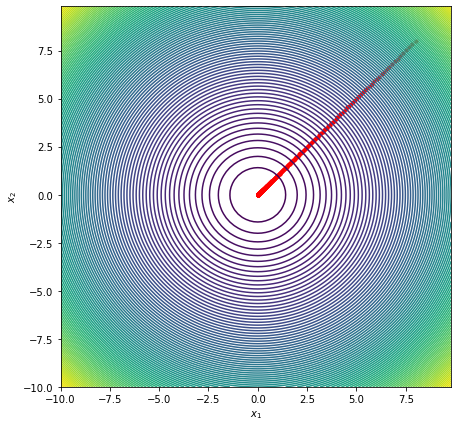

In [54]:
show_contours(function_parabola)
plt.scatter(np.array(var_history)[:,0], 
            np.array(var_history)[:,1], 
            s=10, c='r');

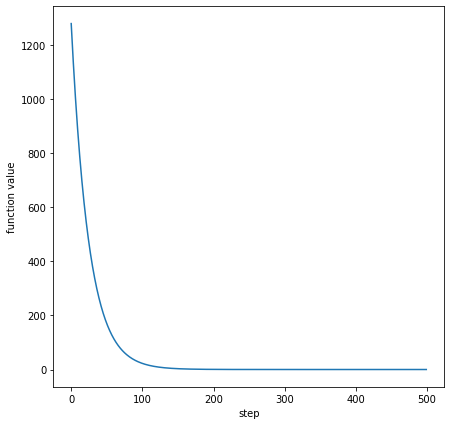

In [55]:
plt.figure(figsize=(7,7))
plt.plot(fn_history);
plt.xlabel('step')
plt.ylabel('function value');

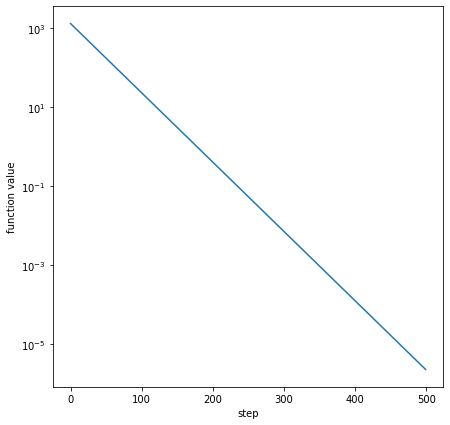

In [56]:
plt.figure(figsize=(7,7))
plt.semilogy(fn_history);
plt.xlabel('step')
plt.ylabel('function value');

In [58]:
torch.tensor([[1., -1.], [1., 1.]]) @ torch.tensor([[1.0, 0.0], [0.0, 4.0]])

tensor([[ 1., -4.],
        [ 1.,  4.]])

In [61]:
x = torch.tensor([8., 8.], requires_grad=True)
var_history = []
fn_history = []

optimizer = torch.optim.SGD([x], lr=0.001) #!!!

In [62]:
x

tensor([8., 8.], requires_grad=True)

In [63]:
# >>> x = torch.tensor([1, 2, 3, 4])
# >>> torch.unsqueeze(x, 0)
# tensor([[ 1,  2,  3,  4]])
# >>> torch.unsqueeze(x, 1)
# tensor([[ 1],
#         [ 2],
#         [ 3],
#         [ 4]])
x.unsqueeze(0)

tensor([[8., 8.]], grad_fn=<UnsqueezeBackward0>)

In [64]:
def function_skewed(variable):
    gramma = torch.tensor([[1., -1.], [1., 1.]]) @ torch.tensor([[1.0, 0.0], [0.0, 4.0]])
    res = 10 * (variable.unsqueeze(0) @ (gramma @ variable.unsqueeze(1))).sum()
    return res

In [65]:
def function_skewed_np(variable):
    gramma = np.array([[1, -1], [1, 1]]) @ np.array([[1.0, 0.0], [0.0, 4.0]])
    res = 10 * (variable.transpose(1, 0) @ (gramma @ variable)).sum()
    return res

In [66]:
for _ in range(500):
    var_history.append(x.data.cpu().numpy().copy())
    fn_history.append(function_skewed(x).data.cpu().numpy().copy())
    make_gradient_step(function_skewed, x)

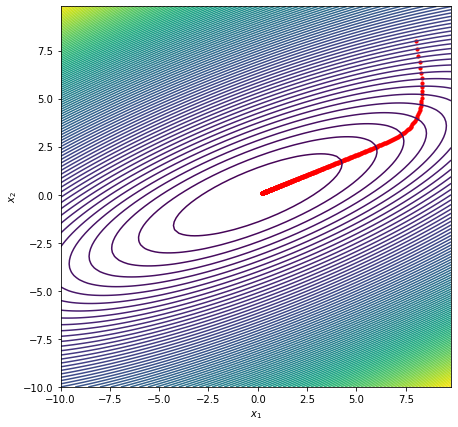

In [68]:
show_contours(function_skewed_np)
plt.scatter(np.array(var_history)[:,0], 
            np.array(var_history)[:,1], 
            s=10, c='r');